In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
alzheimers_data = pd.read_csv('Alzheimers_Data.csv')
# Rename columns to change from all caps.
alzheimers_deathrate = pd.read_csv("Alzheimer's Disease Mortality by State.csv", usecols = ['YEAR','STATE','RATE']).rename(columns = lambda x: x.title())
pd.options.display.max_columns = 38
pd.set_option('max_colwidth', 175)

<h1> Exploring BFRSS Survey Response and connections to Alzheimers </h1>
<p style= 'fontsize:12'> The goal of this project is to demonstrate ability to extract/manipulate information from datasets and present findings in an understanable manner. </p>
<p style = 'fontsize:12'> This project used a combination of the Behavioral Risk Factor Surveliance System (BFRSS) survey data (data retrieved from <a href = 'https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data-0a282'> data.gov </a> database) and Alzheimers deathrates by State (courtsey of <a href = 'https://www.cdc.gov/nchs/pressroom/sosmap/alzheimers_mortality/alzheimers_disease.htm'> CDC website </a>). </p>

<h2> Understanding the BFRSS Survey </h2>
<p style = 'fontsize:12'> The BRFSS is conducted annually to households around the nation. The survey asked a multitude of questions relating to personal and family health. Ages 18 and above are eligible to answer, and questions can cover health topics unrelated to Alzheimers. The data used in this project contains only survey questions that may be connected with Alzheimers, and includes only respones by individuals in four distinct age ranges: 50-54, 55-59, 60-64, and 65+ </p>
<p style = 'fontsize:12'> Survey includes information relating to all 50 states as well as territories (e.g. Virgin Islands). To limit the breadth of data, we will be observing only state in the 'Midwest' region. As defined by the U.S. Census, the following states are included: Iowa (Abbreviated IA), Illinois (IL), Indiana (IN), Kansas (KS), Michigan (MI), Minnesota (MN), Missouri (MO), Nebraska (NE), North Dakota (ND), Ohio (OH), South Dakota (SD), Wisconsin (WI). </p>
<p style = 'fontsize: 12'> Each row in the dataset correspons to a state's percentage (or in some cases, number of days) of 'Yes' responses to a question. Each row has one of the four age ranges. For example, a question entitled "Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days" could have four unique rows, each with a different percentage correspoding to the age demographic surveyed. The dataset contains responses from 2011 to 2017. See example below: </p>

In [2]:
# Example: 
state = alzheimers_data['LocationAbbr'] == 'MI'
year = alzheimers_data['YearStart'] == 2011
question = alzheimers_data['Question'] == 'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days'
alzheimers_data[state & year & question][['YearStart','LocationAbbr','Question','Stratification1','Data_Value']]
# Four row entries for per question, per state, per year. Note the age column is named 'Stratification1'

,YearStart,LocationAbbr,Question,Stratification1,Data_Value
12443,2011,MI,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,60-64 years,17.1
21576,2011,MI,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,50-54 years,27.0
22616,2011,MI,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,55-59 years,22.3
23264,2011,MI,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,65 years or older,9.9


<h2> Variables </h2>
<p style = 'fontsize:12'> There are 38 columns in the Alzheimers dataset. However, we will only be using five of them. The five are listed below. 
<menu>
<li>
    YearStart: Year survey was conducted
    </li>
    <li>
    LocationAbbr: State Abbreviation
    </li>
    <li>
    Question: Survey Question
    </li>
    <li>
    Stratification1: Age demographic
    </li>
    <li>
    Data_Value: Data value corresponding to the question asked. 
    </li>
    </p>

<h2> Concerns around BRFSS data </h2>
<p style = 'fontsize: 12'> No data is without its faults. BFRSS is no exception. Some questions have missing percentages. Not every question is asked every year (e.g. a question regarding fruit consumption was not asked until recently), and even the ones that should have been answered are missing a corresponding data value. 'Stratification' has entries for 'Race' and 'Gender', but are entered inconsistently. The most glaring issue is the lack of sample size for responses. BFRSS keeps track of sample at a state-wide level, but does not provide a breakdown for age ranges. Detailed information relating to their survey methodology can be found in the 'Summary Data Quality Report' released along with each years report. 2011 Summary Data Quality Report can be found <a href = 'cdc.gov/brfss/annual_data/annual_2011.htm'> here</a>. Survey data for each individual year can be found <a href = 'cdc.gove/brfss/annual_data/annual_data.htm'> here</a>.
<p> Despite these concerns, the BRFSS provides adequate data for the exploration purposes </p>

<h3> Reduce to Midwest </h3>
<p style='fontsize:12'> The following code will reduce full dataset down to include only the midwest. </p>

In [3]:
# Midwestern abbreviations
midwest = ['IA','IL','IN','KS','MI','MN','MO','OH','NE','ND','SD','WI']
# Region boolean 'mask'
region_mask = alzheimers_data['LocationAbbr'].apply(lambda x: True if x in midwest else False)
# Midwestern dataframe
alzheimers_midwest = alzheimers_data[region_mask].reset_index(drop = True)

In [4]:
# Is there missing data in midwest region?
alzheimers_midwest['Data_Value'].isna().sum()

1359

In [5]:
# Is it concentrated in a particular state?
alzheimers_midwest[alzheimers_midwest['Data_Value'].isna()]['LocationAbbr'].value_counts()
# No

KS    128
SD    124
ND    124
IA    120
IL    118
MI    113
MO    112
NE    110
IN    108
OH    104
WI    102
MN     96
Name: LocationAbbr, dtype: int64

In [6]:
# Which questions have missing response data?
alzheimers_midwest[alzheimers_midwest['Data_Value'].isna()]['Question'].value_counts()

Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years                                                                       180
Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores    171
Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months              132
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities                 131
Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month                                                   128
Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care

<p style = 'fontsize':12> <b> Note:</b> Questions with missing data values were eliminated from exploration. This eliminates questions that could reasonable be worth exploring, namely questions relating to cognitive decline/memory loss. Since they were missing data, they were not included. In defense of this decision, no assumptions could be made about the value of the missing data. This project will note correlation between questions that on the surface do not appear related to Alzheimers. </p>

In [7]:
# Which questions that do not have missing response values
midwest_question_list = list(alzheimers_midwest['Question'].unique())
midwest_question_list_missing = list(alzheimers_midwest[alzheimers_midwest['Data_Value'].isna()]['Question'].unique())
for question in midwest_question_list:
    if question not in midwest_question_list_missing:
        print(question)
# These will be the questions we use for analysis. Only rows without missing response values will be included
alzheimers_midwest = alzheimers_midwest[alzheimers_midwest['Data_Value'].notnull()]

Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more
Percentage of older adults with a lifetime diagnosis of depression
Mean number of days with activity limitations in the past month
Physically unhealthy days (mean number of days in past month)
Percentage of older adult women who have received a mammogram within the past 2 years
Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease
Percentage of older adults who are experiencing frequent mental distress
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine
Percentage of older adults who had a cholesterol screening within the past 5 years
Percentage of older adults getting sufficient sleep (>6 hours)
Percentage of older adults who self-reported that their health is "fair" or "poor"
Percentage of older adult women who are up to date with select clinical preventive services
Perce

<h2> Introducting Mortality Rates </h2> 
<p style = 'fontsize: 12'> With the questions selected, how do we narrow the list further? Which questions do we want to explore? I will make selections based on how each percentage correlates with state-level alzheimer mortality rates. To do this, I will bring in a second dataset courtesy of the CDC (link in introduction). </p>
<h3> Variables in Mortality Dataset </h3>
<p style = 'fontsize:12'> A quick overview of the variables in the CDC mortality dataset:
    <menu>
        <li>
                                    Year: Self Explanatory. Note: Mortality only for years 2014-2018. Only overlaps with our BRFSS data set for years 2014-2017. This will limit our comparisons to years 2014-2017
        </li>
        <li>
            State: Self Explanatory
            </li>
        <li>
            Rate: Mortality Rate. The number of deaths per 100,000 total population. 
        </li>
        </menu>
<p style = 'fontsize: 12'> Next, I will print out the the five questions that correlated most with mortality deathrate. This will be done with help from pivot tables. </p>
<p style = 'fontsize: 12'> <b> Note </b>: Survey results were averaged across the four age ranges when 

In [8]:
# Different mask for different column name ('State' vs 'LocationAbbr')
region_mask_2 = alzheimers_deathrate['State'].apply(lambda x: True if x in midwest else False)
alzheimers_deathrate_midwest = alzheimers_deathrate[region_mask_2].reset_index(drop = True)
# Converting year from float to int
alzheimers_deathrate_midwest['Year'] = alzheimers_deathrate_midwest['Year'].apply(lambda x: int(x))

In [9]:

df = alzheimers_midwest[alzheimers_midwest['YearStart'] == 2017]
# Create a pivot table. Pivot table is to put Questions into columns. This puts the response value for each state in a row.
# Note: Percentages were averaged across ages. 
table = pd.pivot_table(df, values = 'Data_Value', index= 'LocationAbbr', columns = 'Question', aggfunc=np.mean).dropna(axis = 1)
display(table.head())
# 2017 Example given below


Question,Mean number of days with activity limitations in the past month,"Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine","Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more",Percentage of older adults who are eating 2 or more fruits daily,Percentage of older adults who are eating 3 or more vegetables daily,Percentage of older adults who are experiencing frequent mental distress,Percentage of older adults who had a cholesterol screening within the past 5 years,Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure,Percentage of older adults who have ever been told by a health professional that they have high blood pressure,Percentage of older adults who have not had any leisure time physical activity in the past month,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,"Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)",Percentage of older adults who reported binge drinking within the past 30 days,Percentage of older adults who reported influenza vaccine within the past year,"Percentage of older adults who self-reported that their health is ""fair"" or ""poor""","Percentage of older adults who self-reported that their health is ""good"", ""very good"", or ""excellent""",Percentage of older adults with a lifetime diagnosis of depression,Physically unhealthy days (mean number of days in past month)
LocationAbbr,,,,,,,,,,,,,,,,,,
IA,5.875,54.550,40.625,32.875,13.800,9.550,93.425,82.575,46.625,29.975,16.750,30.475,14.325,52.825,19.025,80.975,19.625,4.475
IL,5.550,50.250,37.300,37.025,16.650,10.250,94.750,84.550,49.200,28.075,15.825,30.025,14.000,42.750,23.825,76.175,18.075,5.075
IN,6.675,52.175,37.625,29.925,15.325,13.125,93.725,86.100,51.700,32.800,20.975,33.975,10.700,43.900,26.825,73.175,23.450,5.650
KS,5.875,52.075,34.850,31.650,15.375,10.400,93.400,84.700,48.700,31.475,16.225,32.475,10.650,44.075,21.575,78.425,20.775,4.825
MI,7.200,50.275,36.500,33.125,11.800,12.300,94.950,84.275,48.875,29.325,19.450,36.525,12.600,44.325,23.175,76.825,23.050,5.950


In [10]:
# Append the mortality rate to each per year pivot table.
for year in [2014,2015,2016,2017]:
    df = alzheimers_midwest[alzheimers_midwest['YearStart'] == year]
    table = pd.pivot_table(df, values = 'Data_Value', index= 'LocationAbbr', columns = 'Question', aggfunc=np.mean).dropna(axis = 1)
    # Append mortality rate
    index = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['State'].values
    values = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['Rate'].values
    series = pd.Series(values, index, name = year)
    display('Top 5 questions in year {}'.format(str(year)),pd.concat([table,series], axis =1).corr()[year].sort_values(ascending = False)[1:6])

'Top 5 questions in year 2014'

Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days    0.414642
Percentage of older adults who reported influenza vaccine within the past year                                                    0.338790
Percentage of older adult women who are up to date with select clinical preventive services                                       0.310000
Percentage of older adults who have fallen and sustained an injury within last year                                               0.259978
Percentage of older adults getting sufficient sleep (>6 hours)                                                                    0.253549
Name: 2014, dtype: float64

'Top 5 questions in year 2015'

Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure                0.705467
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days                                  0.540476
Average of 20 or more hours of care per week provided to a friend or family member                                                                              0.218575
Percentage of older adults who have not had any leisure time physical activity in the past month                                                                0.164174
Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities    0.160355
Name: 2015, dtype: float64

'Top 5 questions in year 2016'

Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days    0.505790
Percentage of older adult women who have received a mammogram within the past 2 years                                             0.329180
Percentage of older adults who reported binge drinking within the past 30 days                                                    0.242499
Percentage of older adult women who are up to date with select clinical preventive services                                       0.239791
Percentage of older adults who have not had any leisure time physical activity in the past month                                  0.163140
Name: 2016, dtype: float64

'Top 5 questions in year 2017'

Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days         0.365616
Percentage of older adults who reported influenza vaccine within the past year                                                         0.299970
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine    0.210530
Percentage of older adults who have not had any leisure time physical activity in the past month                                       0.143261
Percentage of older adults who reported binge drinking within the past 30 days                                                         0.132906
Name: 2017, dtype: float64

<p style = 'fontsize:12'> Above is printed out correlations for the five questions that correlated most with mortality rate in the giben year. Right off the bat, you can see correlation is not particulary high between the survey respones and actually mortality rates, with the question asking about smoking habits being the most consistent. To get a visual picture, a scatterplot matrix will be constructed. Instead of constructing for each question that appeared in the top 5, we will limit the matrix to questions that appeared in the top 5 of a given year <i> more than once </i>.

In [11]:
# Append the mortality rate to each per year pivot table.
li = []
for year in [2014,2015,2016,2017]:
    df = alzheimers_midwest[alzheimers_midwest['YearStart'] == year]
    table = pd.pivot_table(df, values = 'Data_Value', index= 'LocationAbbr', columns = 'Question', aggfunc=np.mean).dropna(axis = 1)
    # Append mortality rate
    index = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['State'].values
    values = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['Rate'].values
    series = pd.Series(values, index, name = year)
    # display('Top 5 questions in year {}'.format(str(year)),
    li.extend(list(pd.concat([table,series], axis =1).corr()[year].sort_values(ascending = False)[1:6].index))
# Create a dictionary with counts of questions in top five for correlation. 
my_dict = {}
for x in li:
    if x in my_dict:
        my_dict[x] +=1
    else:
        my_dict[x] = 1
# Dictionary contains response values that were in the top-5 of mortality rate correlation in at least one year (2014-2017)        
# Will be creating a scatterplot matrix using response values that appeared more than once.
# For example, 'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days'
# appears in the top 5 each year. See below 
question_count = pd.Series(my_dict).sort_values(ascending = False)
# Questions that appeared more than once
print(question_count[question_count > 1])


Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days    4
Percentage of older adults who have not had any leisure time physical activity in the past month                                  3
Percentage of older adults who reported binge drinking within the past 30 days                                                    2
Percentage of older adult women who are up to date with select clinical preventive services                                       2
Percentage of older adults who reported influenza vaccine within the past year                                                    2
dtype: int64


In [12]:
# Define function that returns values for scatter plots. 
# For scatter plot, need mortality rate on y axis, response rate on x. 
# Retrieve mortality rate from mortality rate table
def pivot_table_alzheimers(year):
    # Returns alzheimers pivot table for given year. 
    df = alzheimers_midwest[alzheimers_midwest['YearStart'] == year]
    table = pd.pivot_table(df, values = 'Data_Value', index= 'LocationAbbr', columns = 'Question', aggfunc=np.mean).dropna(axis = 1)
    return table
def scatterplot_values(year, question):
    # Returns scatterplot values for given 
    y_values = alzheimers_deathrate_midwest[alzheimers_deathrate_midwest['Year'] == year].sort_values(by = 'State')['Rate'].values
    x_values = pivot_table_alzheimers(year)[question].values
    return x_values, y_values
top_5_question = ['Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
                 'Percentage of older adults who have not had any leisure time physical activity in the past month',
                 'Percentage of older adults who reported binge drinking within the past 30 days',
                 'Percentage of older adult women who are up to date with select clinical preventive services',
                 'Percentage of older adults who reported influenza vaccine within the past year']
years = [2014,2015,2016,2017]
# Dictionary assigning questions to 'Q1', 'Q2', etc nomeclature. Reason is to make it easier on scatterplot matrix labeling
question_abbr = ['Q1','Q2','Q3','Q4','Q5']
top_5_question_dict = dict(zip(top_5_question, question_abbr))

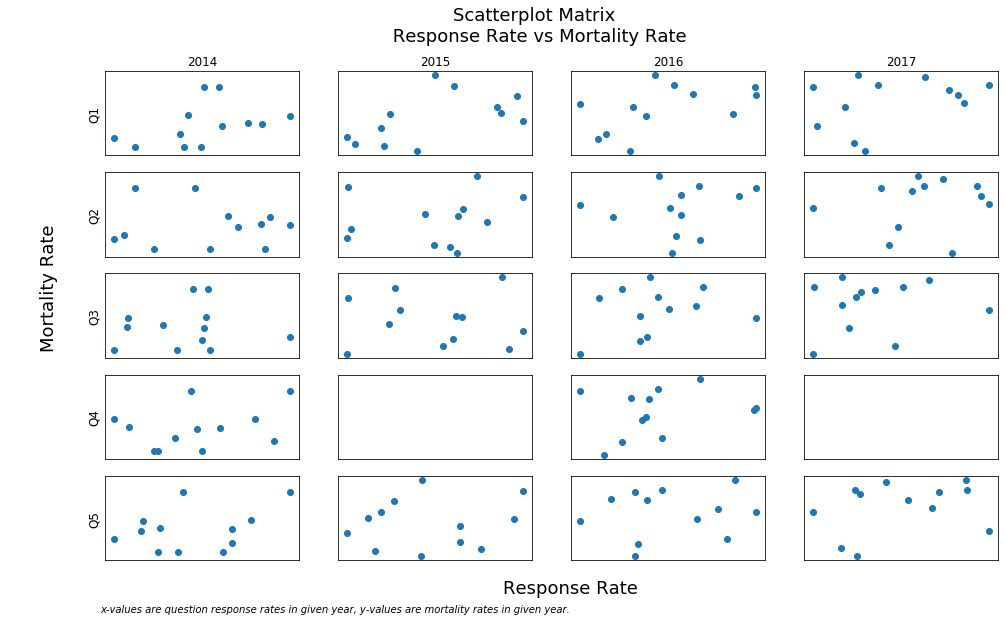

In [13]:
# Create scatter plot matrix
fig, ax = plt.subplots(5,4)
fig.set_size_inches(16,9)
# Loop over axes, build scatterplots
for j in range(len(years)):    
    for i in range(len(top_5_question)):
        try:
            ax[i,j].scatter(scatterplot_values(years[j], top_5_question[i])[0], scatterplot_values(years[j], top_5_question[i])[1])
        except:
            # Error raised if question was not included in survey year. 'Percentage of older adult women who are up to date with select clinical preventive services' 
            # was not available for 2015 or 2017
            continue
# Below 'for' loops serve to eliminate x, y ticks from interior plots, to prevent redundancy in axis.
for i in range(ax.shape[0]): # - 1):
    ax[i, 0].set_xticks([])
for j in range(1, ax.shape[1]):
    ax[ax.shape[0] -1, j].set_yticks([])
for i in range(ax.shape[0]): #- 1):
    for j in range(1,ax.shape[1]):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
# Below 'for' loops specifies labeling for axis.
for i in range(ax.shape[0]):
    ax[i,0].set_ylabel(top_5_question_dict[top_5_question[i]], fontsize = 12)
    ax[i,0].set_ylim(20,40)
    ax[i,0].set_yticks([]) #([20,40])
for j in range(ax.shape[1]):
    # Labels each column with a year
    ax[0,j].set_title(years[j], fontsize = 12)
# Add title to x-axis
ax[2,0].annotate('Mortality Rate', xy = (.04,.45), xycoords = ('figure fraction'), rotation = 90, fontsize = 18)
ax[0,2].annotate('Response Rate', xy = (.5, .06), xycoords = ('figure fraction'), fontsize = 18)
# Add title to matrix 
fig.suptitle('Scatterplot Matrix \n Response Rate vs Mortality Rate', fontsize = 18)
# Add notation
ax[4,0].annotate('x-values are question response rates in given year, y-values are mortality rates in given year.', xy = (.1,.03),
                xycoords = ('figure fraction'), fontsize = 10, fontstyle = 'italic')
plt.show()

In [14]:
# Question glossarys
col1 = list(top_5_question_dict.keys())
col2 = list(top_5_question_dict.values())
display(pd.DataFrame([col2, col1]).T.rename(columns = {0:'QuestionAbbr', 1:'Question'}).set_index(pd.Series([1,2,3,4,5])))

,QuestionAbbr,Question
1,Q1,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days
2,Q2,Percentage of older adults who have not had any leisure time physical activity in the past month
3,Q3,Percentage of older adults who reported binge drinking within the past 30 days
4,Q4,Percentage of older adult women who are up to date with select clinical preventive services
5,Q5,Percentage of older adults who reported influenza vaccine within the past year


<h3> Scatterplot results </h3> 
<p style = 'fontsize:12'> Confirming what we originally thought, the scatterplots indicate little correlation, if any, between survey responses and mortality rates. Part of research means not always finding strong results or uncovering something new. I will conduct some additional data visualization below to highlight my abilities. </p>
<p style = 'fontsize:12'> <b> Note: </b> There are missing scatterplots for Q4 in 2015 in 2017. The reason is the question was not asked in those years, for reasons unknown. </p>

<h3> Barchart Visualization </h3> 
<p style = 'fontstyle: 12'> Using bar graphs, I will explore the results among age groups from my home state of Michigan. I will use the same set of questions, except for Q4. I will be visualizing 2017 survey results.</p>

In [36]:
#Question list without Q4
mi_question_list = ['Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
                   'Percentage of older adults who have not had any leisure time physical activity in the past month',
                   'Percentage of older adults who reported binge drinking within the past 30 days',
                   'Percentage of older adults who reported influenza vaccine within the past year']
# State of Michigan individual: How did Michigan respond to different questions?
mi_df = alzheimers_midwest[alzheimers_midwest['LocationAbbr'] == 'MI']
mi_df = mi_df[mi_df['YearStart'] == 2017]
# Reduce dataframe to include only Michigan and 2017 survey results. Use Pivot table to construct readable table. 
mi_table = pd.pivot_table(mi_df, values = 'Data_Value', index = 'Stratification1', columns = 'Question', aggfunc = np.mean)[mi_question_list].rename(columns = top_5_question_dict)
# Kept 'Q5' abbreviation despite only being four questions. Reason was to stay consistent with previous glossary. 
mi_table

Question,Q1,Q2,Q3,Q5
Stratification1,,,,
50-54 years,22.6,25.5,18.3,31.2
55-59 years,26.3,31.6,15.3,38.7
60-64 years,19.3,29.3,10.7,47.1
65 years or older,9.6,30.9,6.1,60.3


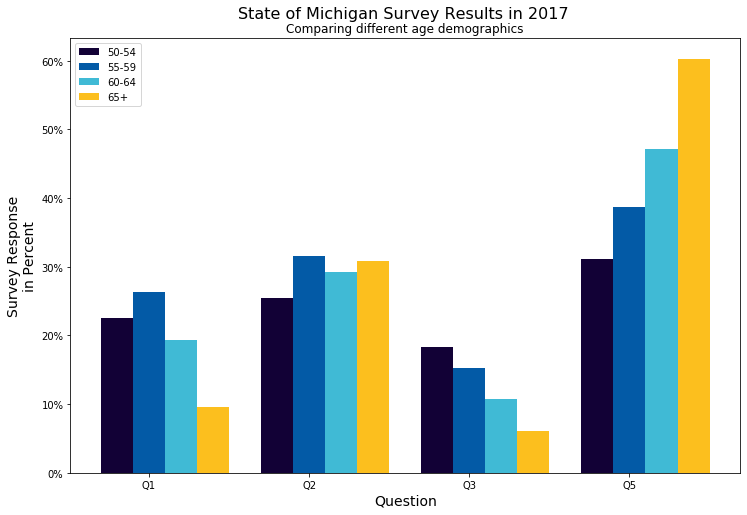

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
x = np.arange(4)
# Create individual bar objects. 
ax.bar(x - .2, mi_table.loc['50-54 years',:].values, width = 0.2, label = '50-54', color = '#120136') # color map found at https://colorhunt.co/palette/180404
ax.bar(x, mi_table.loc['55-59 years',:].values, width = 0.2, label = '55-59', color = '#035aa6')
ax.bar(x + .2, mi_table.loc['60-64 years',:].values, width = 0.2, label = '60-64', color = '#40bad5')
ax.bar(x + .4, mi_table.loc['65 years or older',:].values, width = 0.2, label = '65+', color = '#fcbf1e')
ax.set_xticks(np.arange(4))
# Set tick labels
ax.set_xticklabels(mi_table.columns)
ax.set_yticklabels(['{}%'.format(x) for x in np.arange(0,61,10)])

# Set axis names
ax.set_ylabel('Survey Response\nin Percent', fontsize = 14)
ax.set_xlabel('Question', fontsize = 14)

# Title
fig.suptitle('State of Michigan Survey Results in 2017', y = 0.935, fontsize = 16, x = .51)
ax.set_title('Comparing different age demographics')

ax.legend()
plt.show()

<p style = 'fontsize:12'> Bargraph reveals some interesting trends, including a decline in binge drinking as people age coupled with an increase in yearly flue shots. The steady downtick of binge drinking may indicate people realizing their own mortality. However, the range in ages for '65+' is important to note. '65+' includes 70 and 80 year-olds, who of course will drink less than someone in their 50s. </p>

<h3> Line Chart </h3> 
<p style = 'fontstyle: 12'>  Our last visualization will be a line chart. Once again, I will explore our question list (excluding 'Q4') as it relates to Michigan. In this visualization I will graph out the changes in Michigan survey responses from 2011 to 2017. Hopefully we will see binge-drinking, smoking rates decrease. </p>

In [91]:
# Line chart, with 'Questions' as lines. The y-axis will be survey response %, x-axis will be years. 
# Aggregate results across age demographics. 
# Recreate mi_df, including each year
mi_df_2 = alzheimers_midwest[alzheimers_midwest['LocationAbbr'] == 'MI']
# Another pivot table. Questions are organized by row now.
mi_year_table = pd.pivot_table(mi_df_2, values = 'Data_Value', index = 'Question', columns = 'YearStart',aggfunc =np.mean).loc[mi_question_list,:].rename(index = top_5_question_dict)
mi_year_table

YearStart,2011,2012,2013,2014,2015,2016,2017
Question,,,,,,,
Q1,19.075,19.600,18.800,17.775,19.275,18.975,19.450
Q2,27.150,26.275,26.725,28.525,28.475,27.550,29.325
Q3,13.250,13.400,12.975,12.950,13.025,13.175,12.600
Q5,43.275,42.400,43.500,43.950,43.675,42.250,44.325


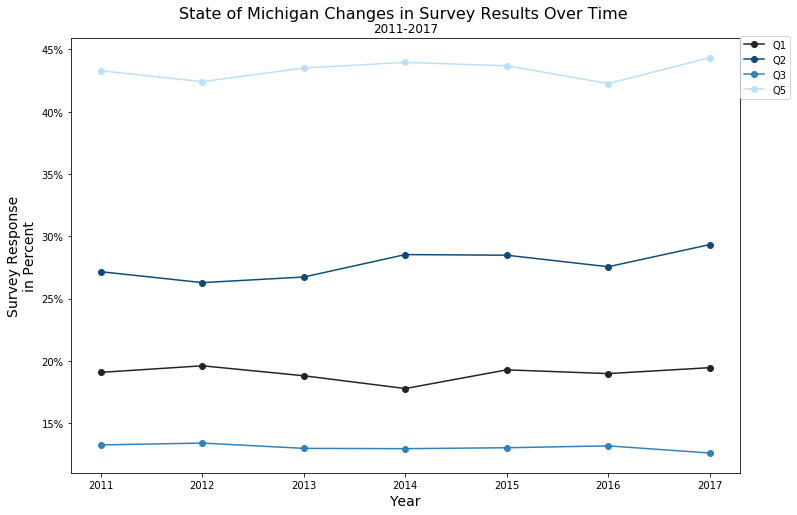

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
# Plot each line plot. Each line represent the survey results for a given question
ax.plot(mi_year_table.columns, mi_year_table.loc['Q1',:].values, label = 'Q1', marker = 'o', color = '#1b262c') # Dot represents survey result
ax.plot(mi_year_table.columns, mi_year_table.loc['Q2',:].values, label = 'Q2', marker = 'o', color = '#0f4c75') # Color map from https://colorhunt.co/palette/167893
ax.plot(mi_year_table.columns, mi_year_table.loc['Q3',:].values, label = 'Q3', marker = 'o', color = '#3282b8')
ax.plot(mi_year_table.columns, mi_year_table.loc['Q5',:].values, label = 'Q5', marker = 'o', color = '#bbe1fa')
ax.legend(loc = (1,.86))
# Set tick labels
ax.set_yticklabels(['{}%'.format(x) for x in np.arange(10,46,5)])

# Set axis labels
ax.set_ylabel('Survey Response\nin Percent', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

# Set Title
fig.suptitle('State of Michigan Changes in Survey Results Over Time', y = 0.935, fontsize = 16, x = .51)
ax.set_title('2011-2017', fontsize = 12)

plt.show()

<p style = 'fontstyle:12'> Observing the line graph, its clear that survey results have not changed much over the years, with the question regarding binge drinking staying as flat as can be (At least it is not increasing). </p>

<h2> Conclusion </h2>
<p style = 'fontsize:12'> Unfortunately, no groudbreaking insight was uncovered in this base-level analysis. The purpose of this project was to demonstrate abilities in pandas and matplotlib, and using those abilities to present data in an understandable way. The survey response data is large enough to support a multitude of queries (what does this data look like for the South region? Northeast? How do mortality rates between regions compare?). The answer to these questions were not answered in this analysis; that does not mean they cannot be. The scope of this project was narrowed to allow for a demonstration of coding ability. Additional queries using the BFRSS and CDC mortality rate table are welcome. Thank you for taking the time to read through this project </p>